In [1]:
cd /home

/home


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import umap
import os 

from src.models.astromer_2 import get_ASTROMER as get_ASTROMER_2, \
                                  build_input as build_input_2, \
                                  predict as predict_2, \
                                  restore_model as restore_model_2,\
                                  get_embeddings as get_emb_2
from src.models.astromer_1 import get_ASTROMER, build_input, predict, restore_model, \
                                  get_embeddings as get_emb_1
from src.data import get_loader


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

%load_ext autoreload
%autoreload 2

2023-11-07 16:11:32.285182: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.5) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
# path = './presentation/experiments/astromer_2/results/astromer_2_clean/2023-11-02_20-32-34/pretraining/'
path = './presentation/experiments/astromer_1/results/astromer_1_clean_2/2023-11-02_20-33-24/pretraining/'
astromer, model_config = restore_model(path)    

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-11-07 16:11:37.532481: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 16:11:37.535161: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 16:11:37.535457: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-07 16:11:37.536029: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

first
[INFO] LOADING PRETRAINED WEIGHTS


In [4]:
datapath = './data/records/alcock/fold_0/alcock/'
objects_df = pd.read_csv(os.path.join(datapath, 'objects.csv'))
num_cls = objects_df.shape[0]
dataset = get_loader(os.path.join(datapath, 'test'),
                     batch_size=2000, 
                     window_size=model_config['window_size'],
                     probed_frac=0.,
                     random_frac=0.,
                     nsp_prob=0.,
                     sampling=False,
                     shuffle=False,
                     repeat=1,
                     num_cls=num_cls,
                     aversion='1')

[INFO] Repeating dataset x1 times
[INFO] Loading PT task: Masking


In [19]:
cls_label = np.concatenate([np.argmax(y.numpy(), 1) for x, y in dataset], axis=0)

In [9]:
obs_emb = get_emb_1(astromer, dataset)

In [11]:
reducer = umap.UMAP()

In [12]:
obs_emb.shape

(14256, 51200)

In [ ]:
emb_cls = reducer.fit_transform(cls_emb)

In [14]:
emb_obs = reducer.fit_transform(obs_emb)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [15]:
emb_obs.shape

(14256, 2)

In [16]:
objects_df

,label,size
0,Cep_0,1082
1,Cep_1,583
2,EC,6724
3,LPV,2946
4,RRab,7297
5,RRc,1662


Text(0.5, 1.0, 'OBS Embedding Space')

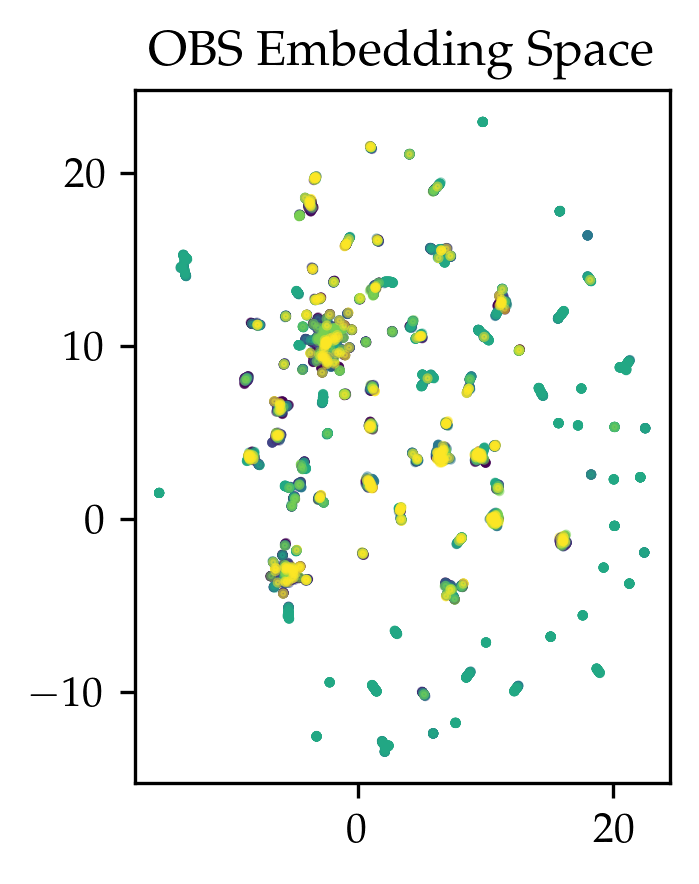

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(2.3,3), dpi=300)

ax.scatter(
        emb_obs[:, 0],
        emb_obs[:, 1], s=2, alpha=0.5,
        c=cls_label)

ax.set_title('OBS Embedding Space')


Text(0.5, 1.0, 'OBS Embedding Space')

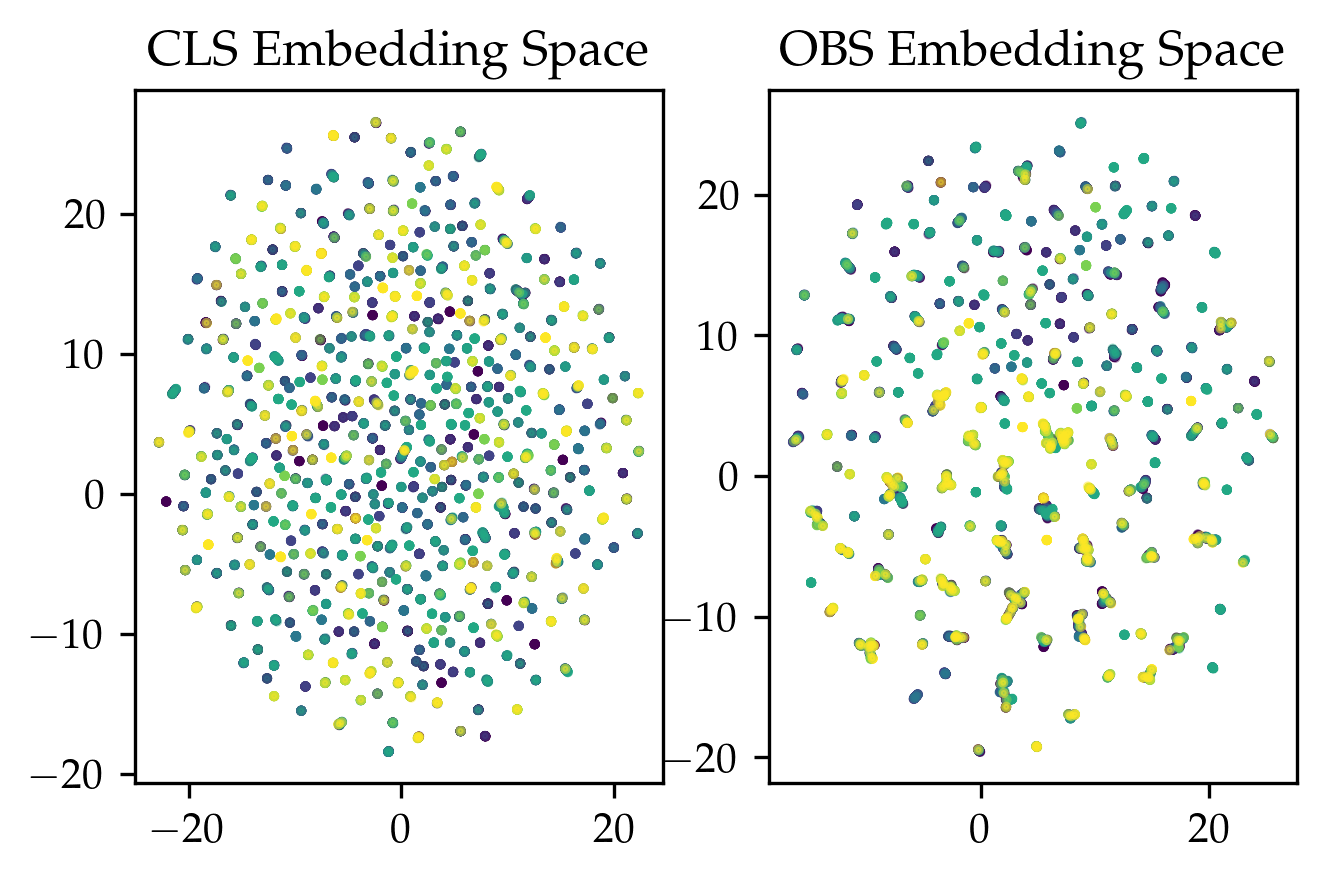

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(5,3), dpi=300)
axes[0].scatter(
        emb_cls[:, 0],
        emb_cls[:, 1], s=2, alpha=0.5,
        c=cls_label)
axes[1].scatter(
        emb_obs[:, 0],
        emb_obs[:, 1], s=2, alpha=0.5,
        c=cls_label)
axes[0].set_title('CLS Embedding Space')
axes[1].set_title('OBS Embedding Space')